## Installation

1. Open a terminal
2. Create a conda environment
   ```
   conda create -n myenv python=3.10
   conda activate myenv
   ```

3. Intall Dosepy
   ```
   pip install -i https://test.pypi.org/simple/ Dosepy==0.4.1
   ```

## Load an image

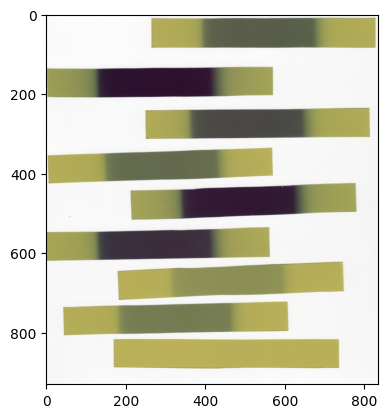

<Axes: >

In [1]:
from Dosepy.tools.image import load
from pathlib import Path

#file_path = Path("/home/luis/Documents/GitHub/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif"  # Office PC
file_path = Path("/home/luis/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif" # Personal laptop

cal_image = load(file_path, for_calib = True)
cal_image.plot()

### Get calibration

Number of images detected: 9


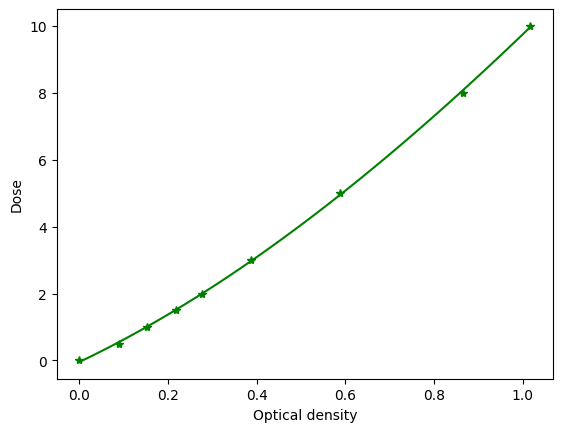

<Axes: xlabel='Optical density', ylabel='Dose'>

In [2]:
imparted_doses = [0, 0.5, 1,1.5, 2, 3, 5, 8, 10]
cal = cal_image.get_calibration(doses = imparted_doses, channel = "G", field_in_film = True)
cal.plot(color = 'green')

## Application of calibration curve

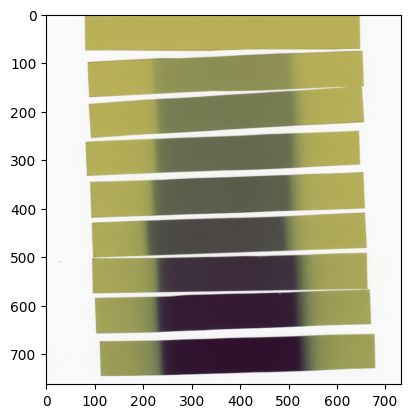

<Axes: >

In [3]:
test_image_path = Path("/home/luis/Descargas") / "POS 11 SIN CARTULINA.tif" # Laptop
#test_image_path = Path("/home/luis/Downloads") / "POS 11 SIN CARTULINA.tif" # PC office

test_image = load(test_image_path)
test_image.plot()

In [4]:
dose_img = test_image.to_dose(cal)

Number of images detected: 8


### Plot dose map

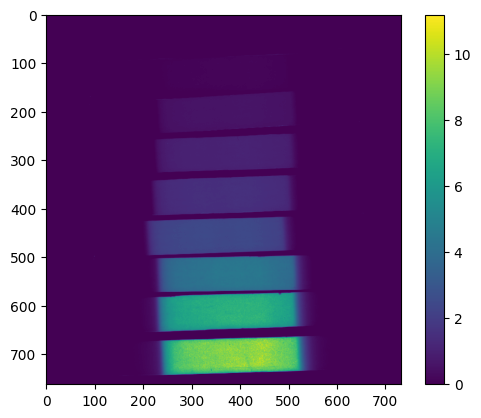

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_img)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

### Difference

In [6]:
import numpy as np
from calibration import polynomial_g3

mean_pixel, std = test_image.get_stat(ch = "G", field_in_film = True, ar = 0.4)
mean_pixel = sorted(mean_pixel, reverse = True)

optical_density = -np.log10(np.array(mean_pixel)/mean_pixel[0])

dosis_from_fit = polynomial_g3(optical_density, *cal.popt)
dosis_from_fit[dosis_from_fit < 0] = 0 # Remove doses < 0

for i in range(9,2,-1):
    print(f"Film {i}: {100*(dosis_from_fit[i-2] - imparted_doses[i-1])/imparted_doses[i-1]:.1f} %")
    print(f"    {imparted_doses[i-1]:0.1f}, {dosis_from_fit[i-2]:0.1f}")

Number of images detected: 8
Film 9: -1.1 %
    10.0, 9.9
Film 8: -2.5 %
    8.0, 7.8
Film 7: 0.1 %
    5.0, 5.0
Film 6: -1.0 %
    3.0, 3.0
Film 5: -0.1 %
    2.0, 2.0
Film 4: 1.8 %
    1.5, 1.5
Film 3: -44.5 %
    1.0, 0.6


### Test dose image (Under development)

In [7]:
from calibration import polynomial_g3
import matplotlib.pyplot as plt
import numpy as np

from skimage.filters.rank import mean_percentile, mean
from skimage.morphology import disk, square

Number of images detected: 8


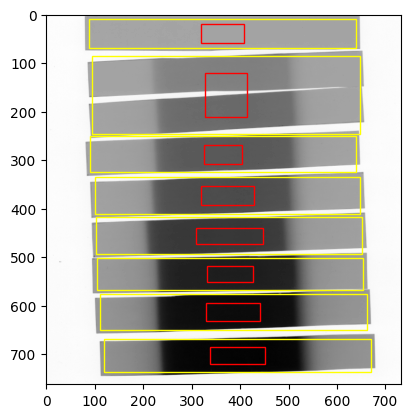

mean, standar deviation


[(45024, 163),
 (36629, 175),
 (27198, 277),
 (23831, 275),
 (18488, 211),
 (11490, 208),
 (6482, 280),
 (4392, 306)]

In [8]:
footprint = square(3)
#for i in [0,1,2]:
#    test_image.array[:,:,i] = mean_percentile(test_image.array[:,:,i], footprint=footprint, p0=.05, p1=.95)

#test_image.array[:,:,1] = mean_percentile(test_image.array[:,:,1], footprint=footprint, p0=.05, p1=.95)
#test_image.array[:,:,1] = mean(test_image.array[:,:,1], footprint=footprint)

mean_pixel, std = test_image.get_stat(ch = "G", field_in_film = True, ar = 0.4, show = True)
mean_pixel = sorted(mean_pixel, reverse = True)

print("mean, standar deviation")
list(zip(mean_pixel, std))

In [9]:
cal.popt # Coeficients used by the fit function.

array([-0.04277797,  6.30913712,  4.05265265, -0.56727947])

In [10]:
cal.optical_density

[-0.0,
 0.0886622102434701,
 0.1527450671954092,
 0.21726770346989474,
 0.27664875375928594,
 0.3873000420542609,
 0.5882259453651357,
 0.8640219238957344,
 1.0169659030152558]

In [11]:
-np.log10(np.array(mean_pixel)/mean_pixel[0])

array([-0.        ,  0.08961901,  0.21890711,  0.27630181,  0.38655414,
        0.59312405,  0.84173505,  1.01078174])

In [12]:
do_list = -np.log10(np.array(mean_pixel)/mean_pixel[0])

In [13]:
dosis_from_fit = polynomial_g3(do_list, *cal.popt)
dosis_from_fit[dosis_from_fit < 0] = 0 # Remove doses < 0

In [14]:
dosis_from_fit

array([0.        , 0.55478151, 1.52659057, 1.99787245, 2.96884277,
       5.00666268, 7.80090419, 9.88906893])

In [15]:
for i in range(9,2,-1):
    print(f"Film {i}: {100*(dosis_from_fit[i-2] - imparted_doses[i-1])/imparted_doses[i-1]:.1f} %")


Film 9: -1.1 %
Film 8: -2.5 %
Film 7: 0.1 %
Film 6: -1.0 %
Film 5: -0.1 %
Film 4: 1.8 %
Film 3: -44.5 %


### Dose image

In [16]:
optical_density = -np.log10(test_image.array[:,:,1]/mean_pixel[0])

dose_image = polynomial_g3(optical_density, *cal.popt)
dose_image[dose_image < 0] = 0 # Remove doses < 0

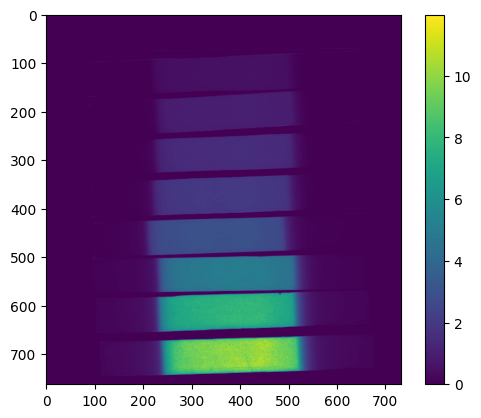

In [17]:
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_image)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

(array([191845., 211751.,  52389.,  29573.,  15066.,  19321.,   5213.,
         17687.,  13977.,   1694.]),
 array([-0.16235939, -0.02912351,  0.10411237,  0.23734825,  0.37058413,
         0.50382002,  0.6370559 ,  0.77029178,  0.90352766,  1.03676355,
         1.16999943]),
 <BarContainer object of 10 artists>)

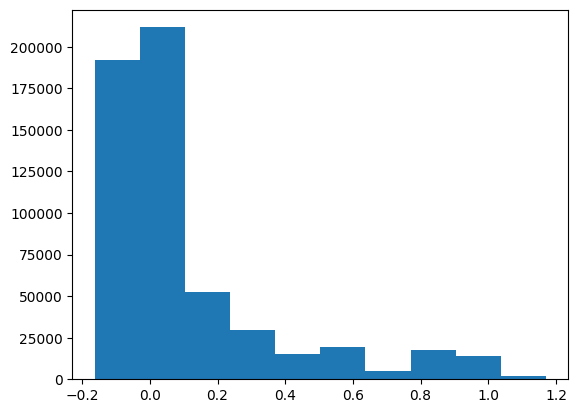

In [18]:
do = -np.log10(test_image.array[:,:,1]/mean_pixel[0])

plt.hist(do.ravel())

### Mean channel

Number of images detected: 9


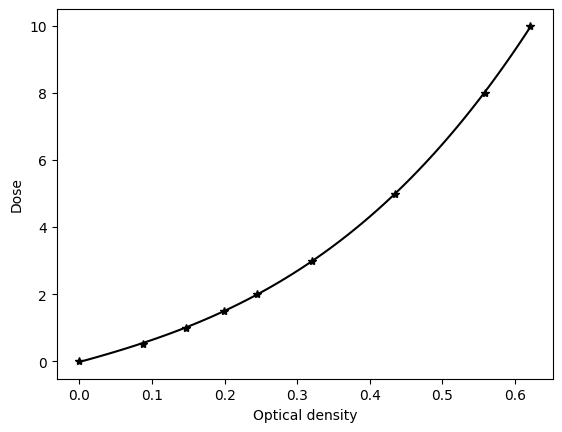

<Axes: xlabel='Optical density', ylabel='Dose'>

In [19]:
cal_mean = cal_image.get_calibration(doses = [0, 0.5, 1,1.5, 2, 3, 5, 8, 10], channel = "mean", field_in_film = True)
cal_mean.plot(color = 'k')

Number of images detected: 8


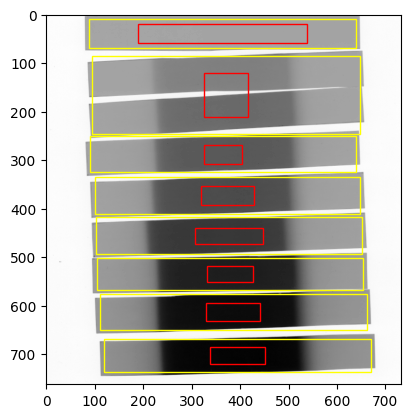

In [20]:
test_image = load(test_image_path)

ref, _ = test_image.get_stat(ch = "mean", field_in_film = True, ar = 0.4, show = True)
ref = sorted(ref, reverse = True)

In [21]:
dosis_list = -np.log10(np.array(ref)/ref[0])
polynomial_g3(dosis_list, *cal.popt)

array([-0.04277797,  0.53899337,  1.36087292,  1.70061867,  2.33308418,
        3.40387732,  4.55901791,  5.19382309])

In [22]:
from image import load

In [23]:
import numpy as np

a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a_img = load(a, filter = 3)

/tmp/ipykernel_54049/897012976.py:4: UserWarning: Possible precision loss converting image of type int64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  a_img = load(a, filter = 3)
/home/luis/miniconda3/envs/dp/lib/python3.10/site-packages/skimage/util/dtype.py:549: UserWarning: Downcasting int64 to uint8 without scaling because max value 9 fits in uint8
  return _convert(image, np.uint8, force_copy)


In [24]:
a_img.array

array([[3, 3, 4],
       [4, 5, 5],
       [6, 6, 7]], dtype=uint8)

In [25]:
from skimage.morphology import square

square(3)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

### Files pixel comparison

Number of images detected: 9


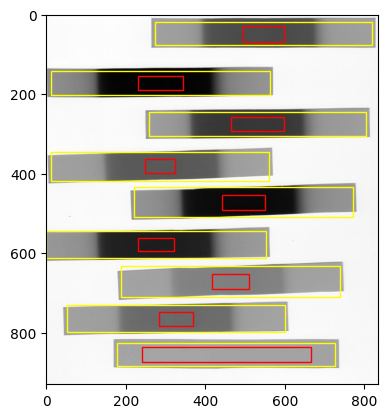

In [26]:
mean_cal, std_cal = cal_image.get_stat(ch = "G", field_in_film = True, ar = 0.4, show = True)
mean_cal = sorted(mean_cal, reverse = True)

In [27]:
print("mean, standar deviation")
list(zip(mean_cal, std_cal))

mean, standar deviation


[(45077, 239),
 (36753, 274),
 (31711, 213),
 (27333, 290),
 (23840, 277),
 (18478, 242),
 (11634, 205),
 (6165, 220),
 (4335, 232)]

In [28]:
print("mean, standar deviation")
list(zip(mean_pixel, std))

mean, standar deviation


[(45024, 163),
 (36629, 175),
 (27198, 277),
 (23831, 275),
 (18488, 211),
 (11490, 208),
 (6482, 280),
 (4392, 306)]

In [29]:
for i in range(8,1,-1):
    dif = mean_cal[i] - mean_pixel[i-1]
    print(dif)

-57
-317
144
-10
9
135
-4918
